
--- Bimodal Distribution Simulation ---
Theoretical Population Mean (μ): 2.5
Theoretical Population Standard Deviation (σ): 2.692582403567252



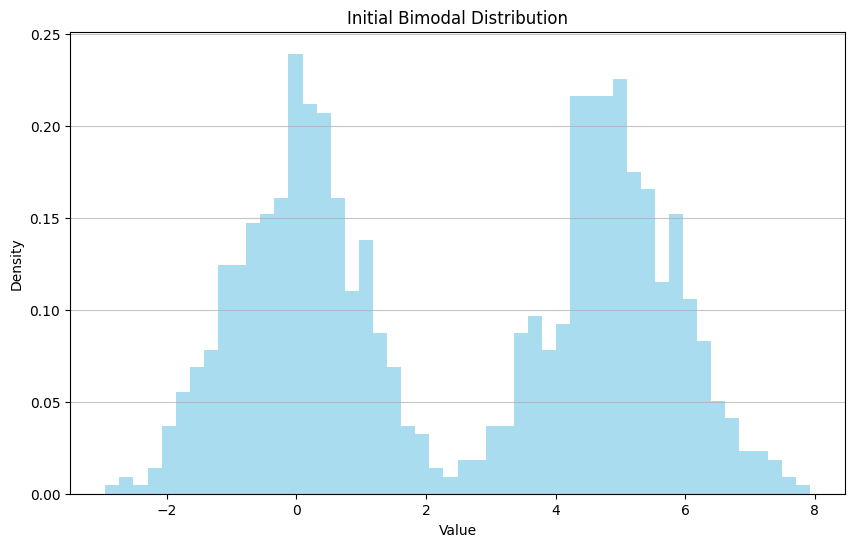

Sample size (n) = 2
  Observed Average of Sample Averages: 2.4475
  Theoretical Average (CLT Prediction):  2.5000
  Observed Spread of Sample Averages: 1.9415
  Theoretical Spread (CLT Prediction):    1.9039



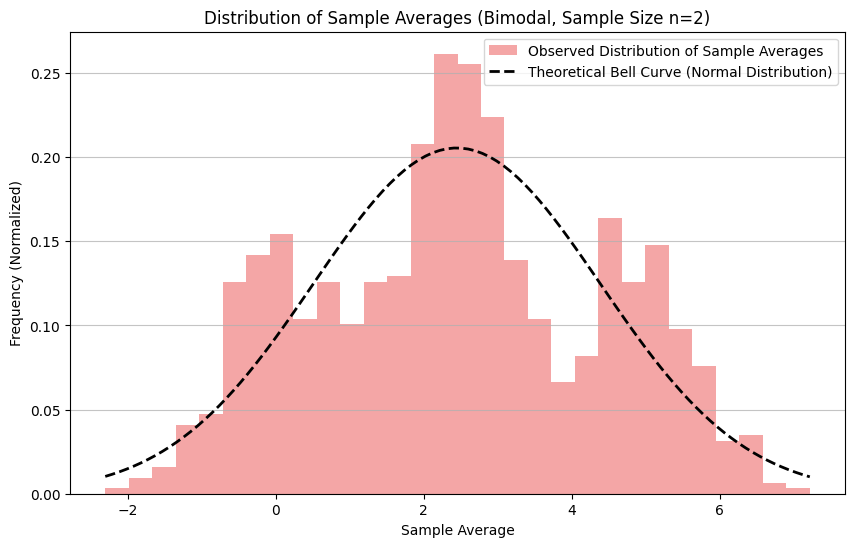

Sample size (n) = 5
  Observed Average of Sample Averages: 2.4184
  Theoretical Average (CLT Prediction):  2.5000
  Observed Spread of Sample Averages: 1.2195
  Theoretical Spread (CLT Prediction):    1.2042



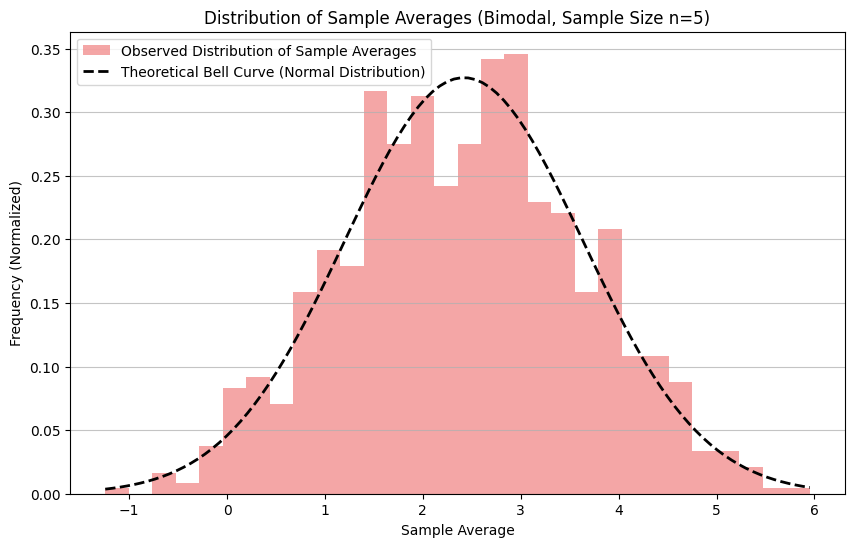

Sample size (n) = 10
  Observed Average of Sample Averages: 2.4554
  Theoretical Average (CLT Prediction):  2.5000
  Observed Spread of Sample Averages: 0.8334
  Theoretical Spread (CLT Prediction):    0.8515



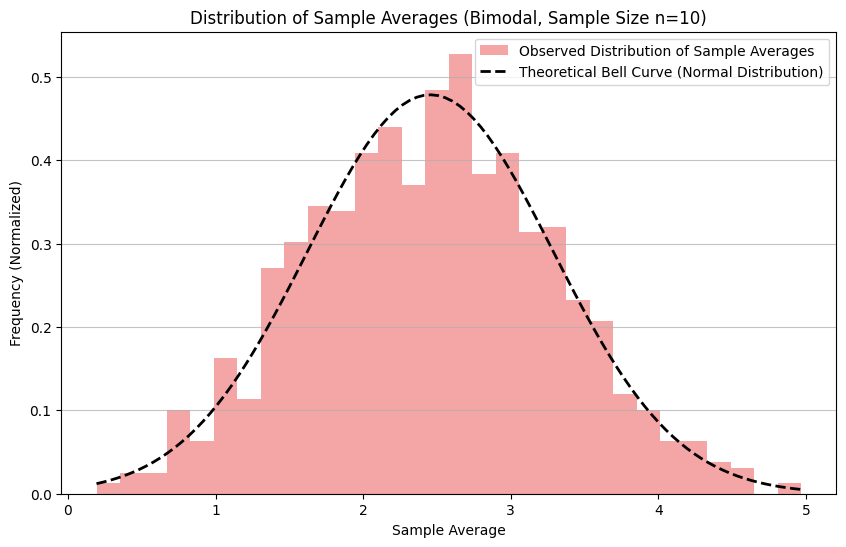

Sample size (n) = 20
  Observed Average of Sample Averages: 2.4841
  Theoretical Average (CLT Prediction):  2.5000
  Observed Spread of Sample Averages: 0.6000
  Theoretical Spread (CLT Prediction):    0.6021



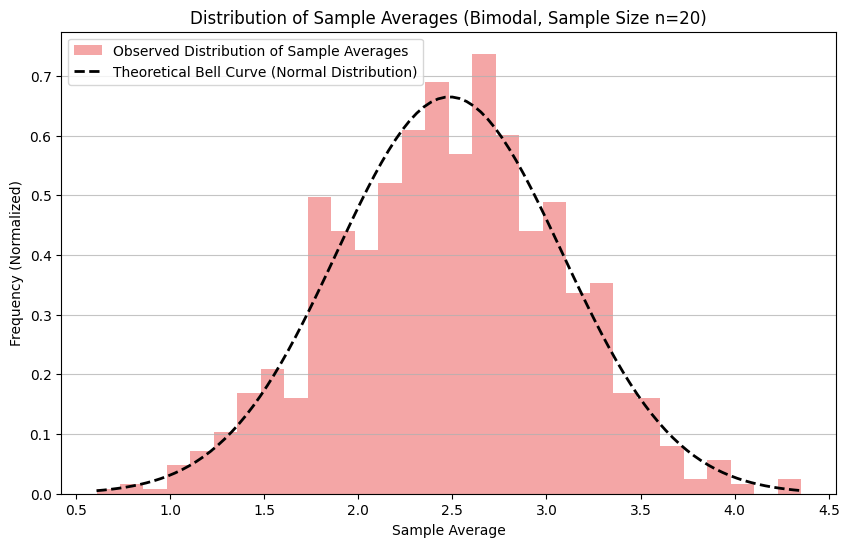

Sample size (n) = 30
  Observed Average of Sample Averages: 2.4541
  Theoretical Average (CLT Prediction):  2.5000
  Observed Spread of Sample Averages: 0.4806
  Theoretical Spread (CLT Prediction):    0.4916



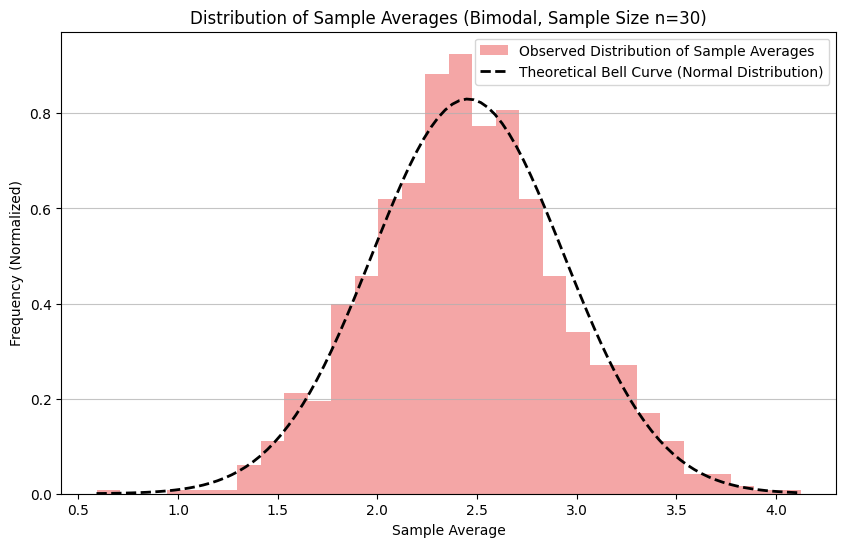

Sample size (n) = 50
  Observed Average of Sample Averages: 2.4798
  Theoretical Average (CLT Prediction):  2.5000
  Observed Spread of Sample Averages: 0.3717
  Theoretical Spread (CLT Prediction):    0.3808



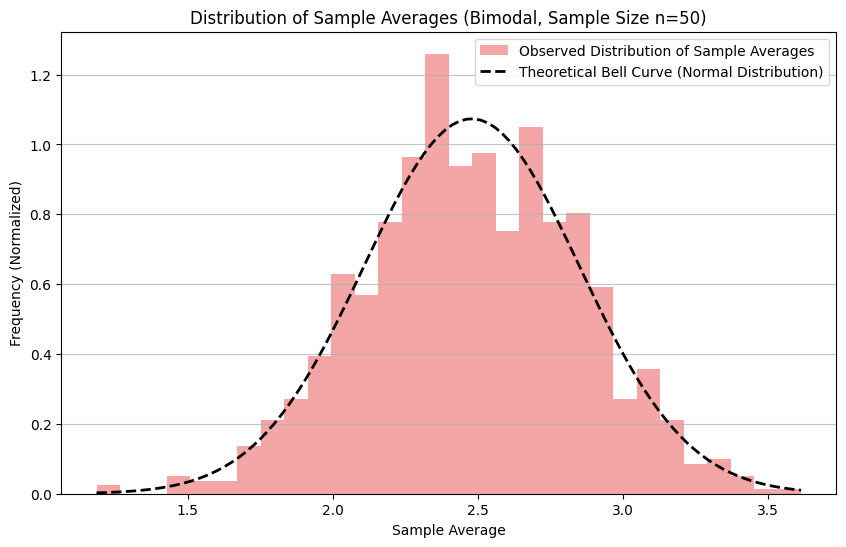

Sample size (n) = 100
  Observed Average of Sample Averages: 2.4754
  Theoretical Average (CLT Prediction):  2.5000
  Observed Spread of Sample Averages: 0.2743
  Theoretical Spread (CLT Prediction):    0.2693



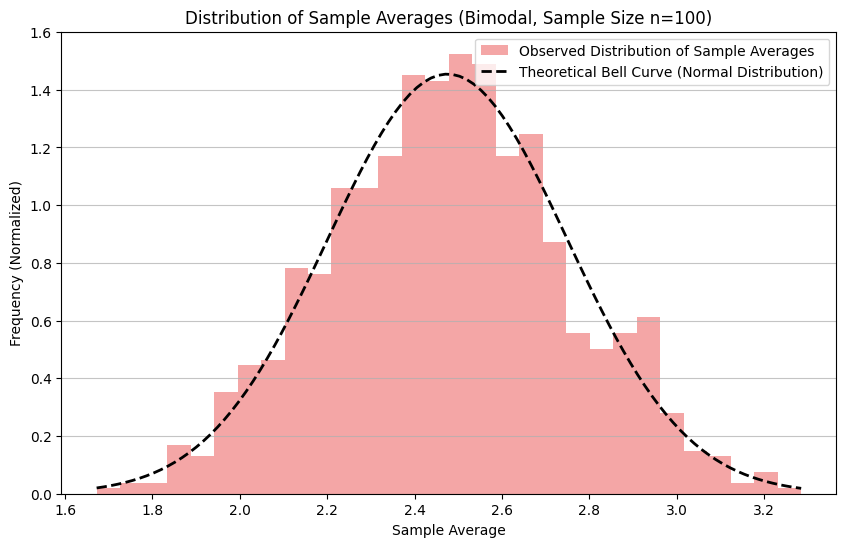

Sample size (n) = 200
  Observed Average of Sample Averages: 2.4795
  Theoretical Average (CLT Prediction):  2.5000
  Observed Spread of Sample Averages: 0.1913
  Theoretical Spread (CLT Prediction):    0.1904



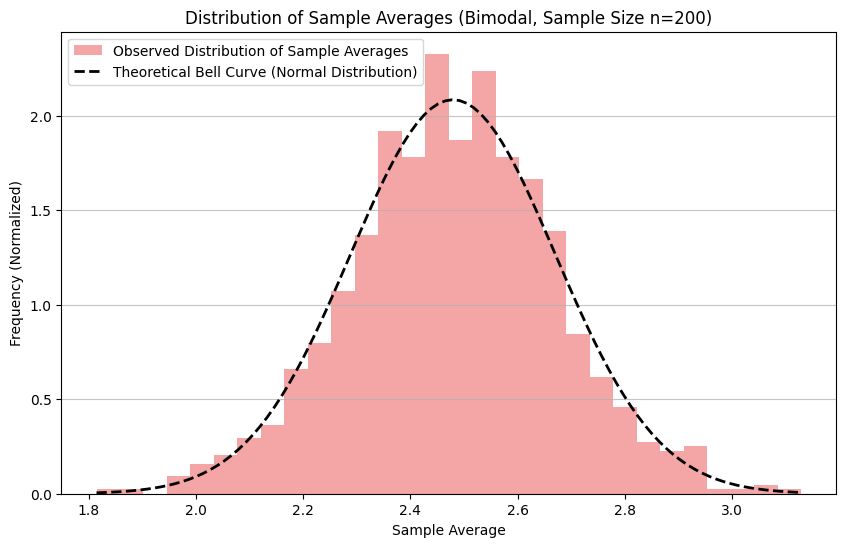


--- Exponential Distribution Simulation ---
Theoretical Population Mean (μ): 1.0
Theoretical Population Standard Deviation (σ): 1.0



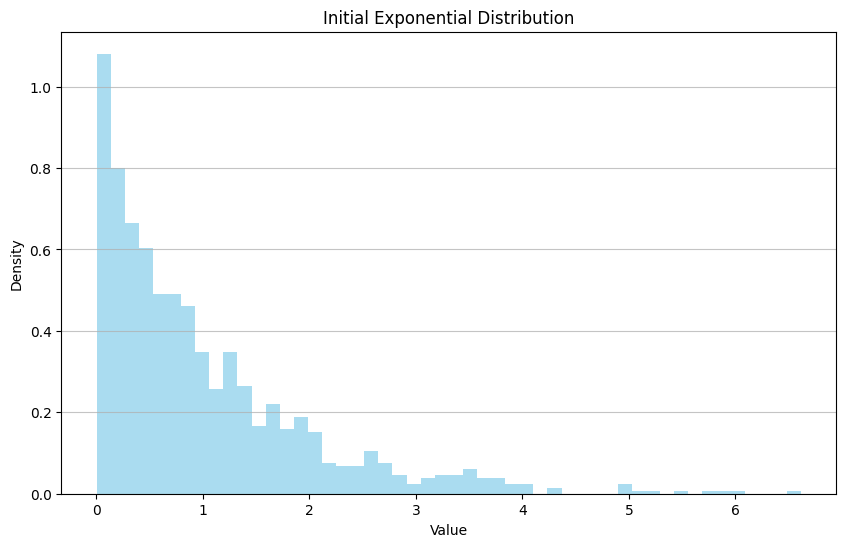

Sample size (n) = 2
  Observed Average of Sample Averages: 0.9855
  Theoretical Average (CLT Prediction):  1.0000
  Observed Spread of Sample Averages: 0.7331
  Theoretical Spread (CLT Prediction):    0.7071



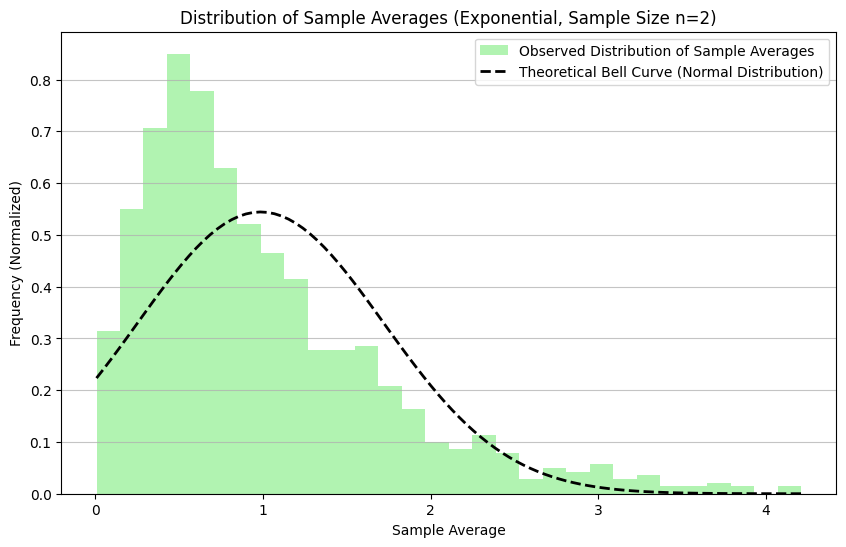

Sample size (n) = 5
  Observed Average of Sample Averages: 0.9984
  Theoretical Average (CLT Prediction):  1.0000
  Observed Spread of Sample Averages: 0.4498
  Theoretical Spread (CLT Prediction):    0.4472



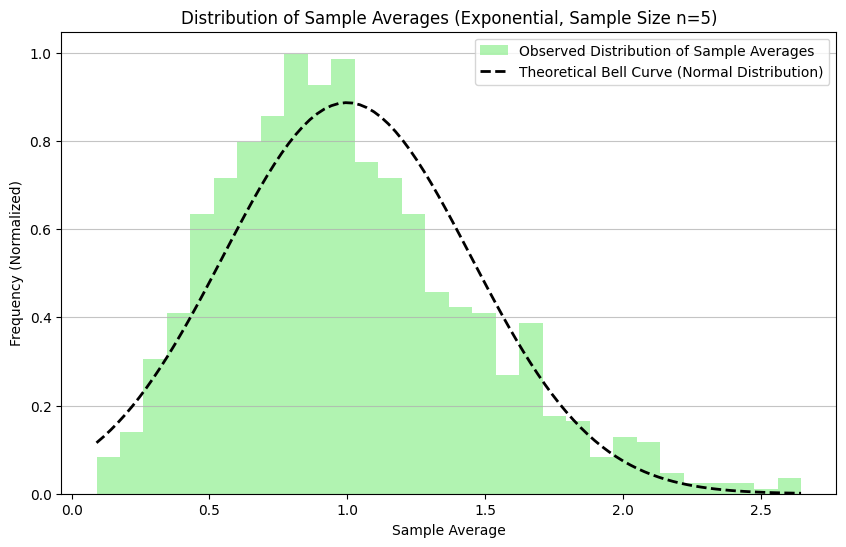

Sample size (n) = 10
  Observed Average of Sample Averages: 0.9937
  Theoretical Average (CLT Prediction):  1.0000
  Observed Spread of Sample Averages: 0.3154
  Theoretical Spread (CLT Prediction):    0.3162



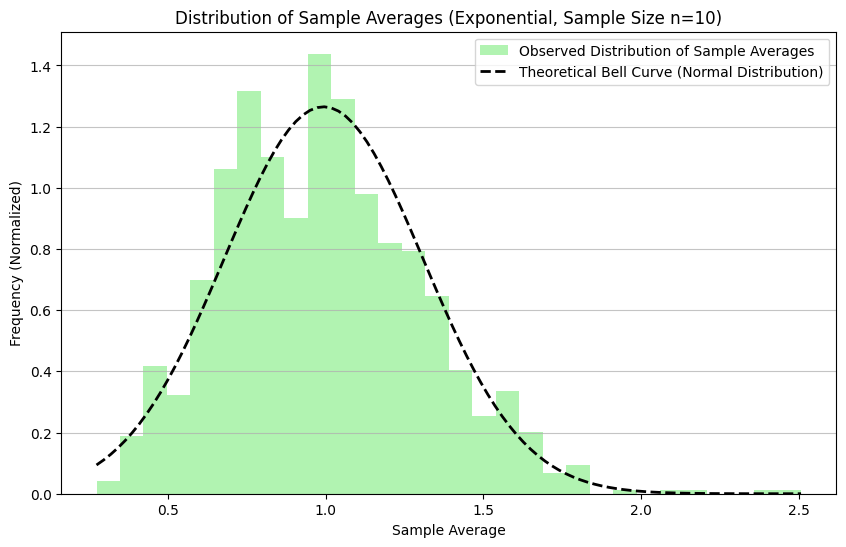

Sample size (n) = 20
  Observed Average of Sample Averages: 0.9873
  Theoretical Average (CLT Prediction):  1.0000
  Observed Spread of Sample Averages: 0.2283
  Theoretical Spread (CLT Prediction):    0.2236



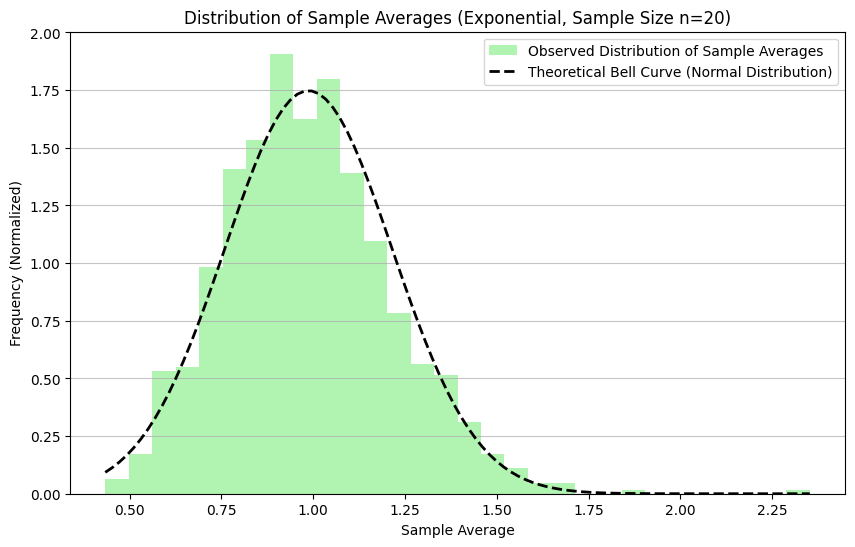

Sample size (n) = 30
  Observed Average of Sample Averages: 0.9946
  Theoretical Average (CLT Prediction):  1.0000
  Observed Spread of Sample Averages: 0.1841
  Theoretical Spread (CLT Prediction):    0.1826



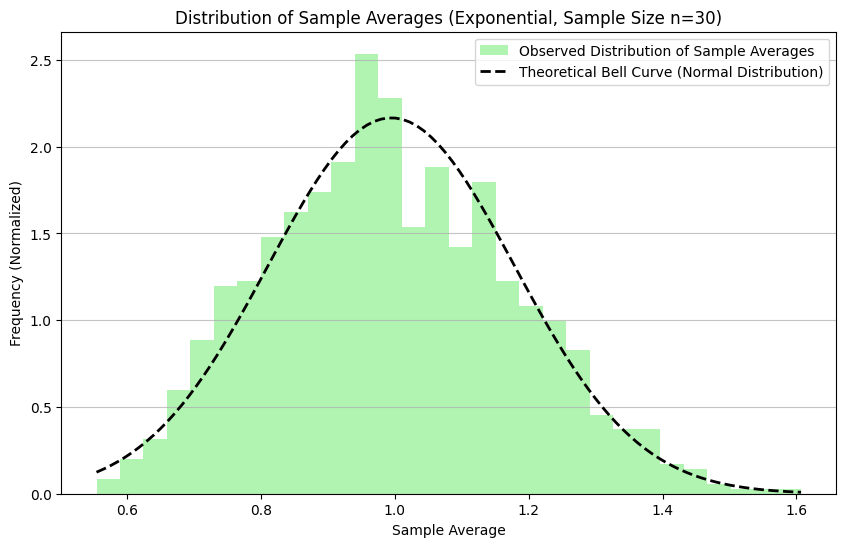

Sample size (n) = 50
  Observed Average of Sample Averages: 0.9915
  Theoretical Average (CLT Prediction):  1.0000
  Observed Spread of Sample Averages: 0.1367
  Theoretical Spread (CLT Prediction):    0.1414



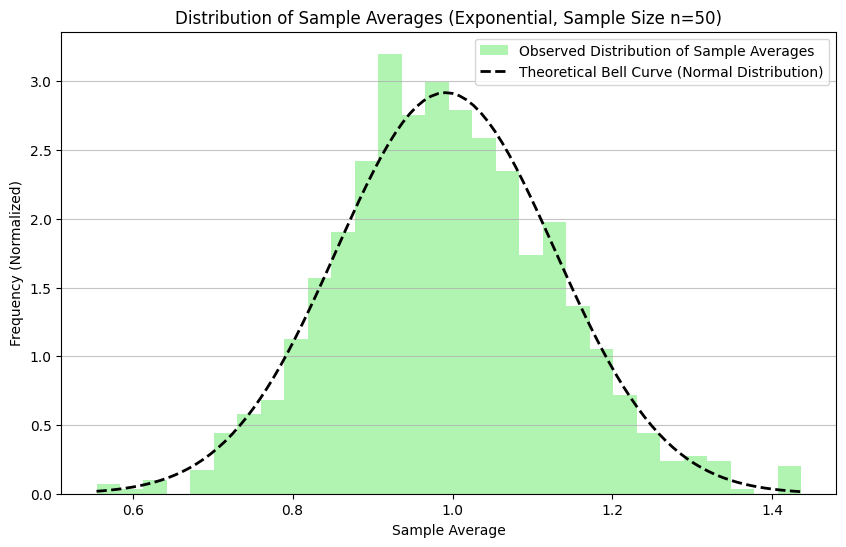

Sample size (n) = 100
  Observed Average of Sample Averages: 0.9948
  Theoretical Average (CLT Prediction):  1.0000
  Observed Spread of Sample Averages: 0.0973
  Theoretical Spread (CLT Prediction):    0.1000



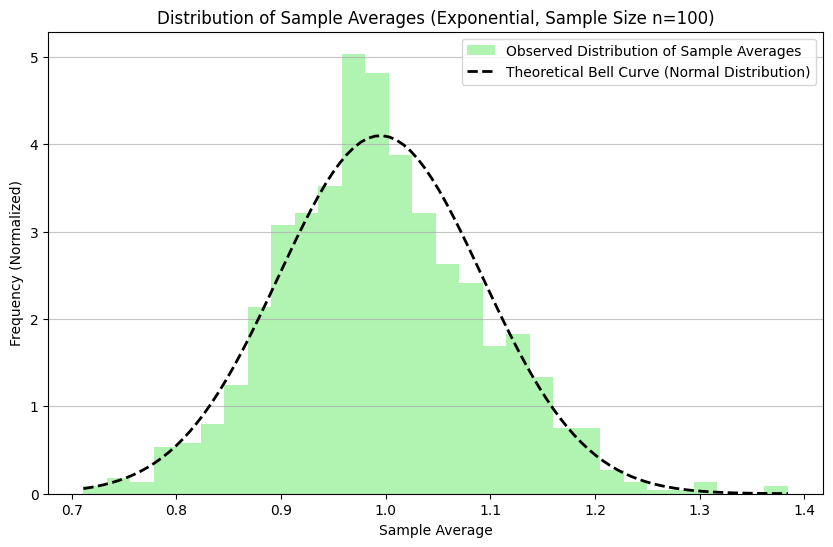

Sample size (n) = 200
  Observed Average of Sample Averages: 0.9911
  Theoretical Average (CLT Prediction):  1.0000
  Observed Spread of Sample Averages: 0.0707
  Theoretical Spread (CLT Prediction):    0.0707



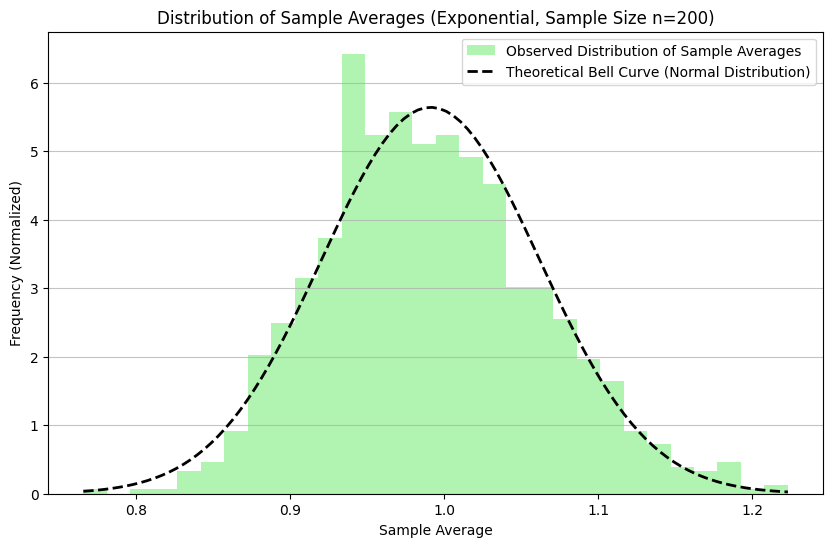

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm # Used to draw the theoretical bell curve

# --- Helper function to run a single simulation ---
def run_clt_simulation(population_data, population_name, theoretical_mean, theoretical_std_dev, color):
    """
    Runs a Central Limit Theorem simulation for a given population.

    Args:
        population_data (numpy.ndarray): The array of numbers representing the population.
        population_name (str): A name for the population (e.g., "Bimodal", "Exponential").
        theoretical_mean (float): The known theoretical mean of the population.
        theoretical_std_dev (float): The known theoretical standard deviation of the population.
        color (str): The color to use for plotting the sample means histogram.
    """
    R = 1000 # Number of times we will take a sample and calculate its mean

    print(f"\n--- {population_name} Distribution Simulation ---")
    print(f"Theoretical Population Mean (μ): {theoretical_mean}")
    print(f"Theoretical Population Standard Deviation (σ): {theoretical_std_dev}\n")

    # Plot the initial population distribution
    plt.figure(figsize=(10, 6))
    plt.hist(population_data, bins=50, density=True, alpha=0.7, color='skyblue')
    plt.title(f"Initial {population_name} Distribution")
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.grid(axis='y', alpha=0.75)
    plt.show()

    # Try different sample sizes
    sample_sizes = [2, 5, 10, 20, 30, 50, 100, 200]

    for n in sample_sizes:
        # Step 1: Take R=1000 groups of size n and calculate their means.
        # We are drawing random numbers from our population, 'n' at a time, R times.
        sample_means = np.array([np.mean(np.random.choice(population_data, n, replace=True)) for _ in range(R)])

        # Calculate the average and spread of the sample means we just got
        observed_mean = np.mean(sample_means)
        observed_std = np.std(sample_means)

        # Calculate what the CLT *predicts* the average and spread of the sample means should be
        theoretical_mean_clt = theoretical_mean # The average of sample means should be the same as the population mean
        theoretical_std_clt = theoretical_std_dev / np.sqrt(n) # The spread gets smaller as sample size increases

        # Print the results so we can compare
        print(f"Sample size (n) = {n}")
        print(f"  Observed Average of Sample Averages: {observed_mean:.4f}")
        print(f"  Theoretical Average (CLT Prediction):  {theoretical_mean_clt:.4f}")
        print(f"  Observed Spread of Sample Averages: {observed_std:.4f}")
        print(f"  Theoretical Spread (CLT Prediction):    {theoretical_std_clt:.4f}\n")

        # Step 2: Plot a histogram of the R sample means to see their distribution shape.
        plt.figure(figsize=(10, 6))
        plt.hist(sample_means, bins=30, density=True, alpha=0.7, color=color,
                 label="Observed Distribution of Sample Averages")

        # Create the values for the theoretical bell curve predicted by the CLT
        x_values = np.linspace(min(sample_means), max(sample_means), 100)
        # Calculate the height of the bell curve at each point, using the observed mean and std
        pdf = norm.pdf(x_values, observed_mean, observed_std)

        plt.plot(x_values, pdf, 'k--', linewidth=2, label="Theoretical Bell Curve (Normal Distribution)")

        plt.title(f"Distribution of Sample Averages ({population_name}, Sample Size n={n})")
        plt.xlabel("Sample Average")
        plt.ylabel("Frequency (Normalized)")
        plt.legend()
        plt.grid(axis='y', alpha=0.75)
        plt.show()

# --- Running the simulations ---
if __name__ == "__main__":
    # --- Bimodal Distribution Simulation ---
    # This population is a mix of two groups: one centered at 0 and one centered at 5
    bimodal_population = np.concatenate((np.random.normal(0, 1, 500), np.random.normal(5, 1, 500)))
    # Theoretical values for this specific bimodal population
    bimodal_mean = 2.5
    bimodal_std_dev = np.sqrt(0.5 * ((0 - 2.5)**2 + 1**2) + 0.5 * ((5 - 2.5)**2 + 1**2))
    run_clt_simulation(bimodal_population, "Bimodal", bimodal_mean, bimodal_std_dev, 'lightcoral')

    # --- Exponential Distribution Simulation ---
    # This population has many small numbers and fewer large numbers
    # Using scale=1 means the average of the population is 1
    exp_population = np.random.exponential(scale=1, size=1000) # Generate 1000 numbers for the population
    # Theoretical values for this specific exponential population with scale=1
    exp_mean = 1.0
    exp_std_dev = 1.0
    run_clt_simulation(exp_population, "Exponential", exp_mean, exp_std_dev, 'lightgreen')